In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
import os
from matplotlib.pyplot import imshow
import scipy.ndimage
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from IPython.display import display
from PIL import Image
from sklearn import preprocessing


Using TensorFlow backend.


In [2]:
def create_dense(num_classes,image_size,layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model

def evaluate(x_train,x_test,y_train,y_test,model, batch_size=128, epochs=100):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [44]:
def MNIST():
    labels = [0,1,2,3, 4,5,6,7,8,9];
    #labels = [0,1];
    X_raw = [];
    Y = []
    for label in labels:
        dirName = '../data/MNIST/'+str(label);
        imgList = os.listdir(dirName);
        for img in imgList:
            X_raw.append(scipy.ndimage.imread(os.path.join(dirName,img)));
            Y.append(label);

    X = [];
    for x in X_raw:
        X.append(x.flatten());
    X = np.array(X);
    Y = np.array(Y).reshape((X.shape[0],1));
    YX = np.concatenate((Y,X),axis=1);


    YX_train, YX_test = train_test_split(YX, train_size = 0.7);

    X_train = YX_train[:,1:];
    Y_train = YX_train[:,0].reshape((YX_train.shape[0],1));

    X_test = YX_test[:,1:]
    Y_test = YX_test[:,0].reshape((YX_test.shape[0],1))

    enc = preprocessing.OneHotEncoder()
    enc.fit(Y_train)  
    Y_train = (enc.transform(Y_train).toarray())
    Y_test = (enc.transform(Y_test).toarray())

    #X_test = (X_test)/255
    #X_train =(X_train)/255
    return X_train,X_test,Y_train,Y_test



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


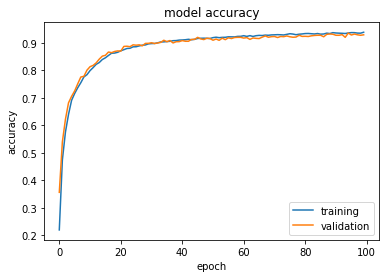


Test loss: 0.302
Test accuracy: 0.911


In [38]:
#for layers in range(1, 5):
X_train,X_test,Y_train,Y_test = MNIST()
model = create_dense(10,784,[32] * 2)
evaluate(X_train,X_test,Y_train,Y_test,model)

In [3]:
# cat-dog

def CatDog():
    labels = [0, 1]

    X_raw = []
    Y = []
    animals = ['cat','dog']
    for label in range(2):
        dirName = '../data/Cat-Dog/'+str(animals[label])
        print(dirName)
        imgList = os.listdir(dirName)
        for img in imgList:
            X_raw.append(plt.imread(os.path.join(dirName,img)))
            Y.append(label)


    X = [];
    for x in X_raw:
        X.append(x.flatten());
    X = np.array(X);
    Y = np.array(Y).reshape((X.shape[0],1));
    YX = np.concatenate((Y,X),axis=1);


    YX_train, YX_test = train_test_split(YX, train_size = 0.7);

    X_train = YX_train[:,1:];
    Y_train = YX_train[:,0].reshape((YX_train.shape[0],1));

    X_test = YX_test[:,1:]
    Y_test = YX_test[:,0].reshape((YX_test.shape[0],1))

    enc = preprocessing.OneHotEncoder()
    enc.fit(Y_train)  
    Y_train = (enc.transform(Y_train).toarray())
    Y_test = (enc.transform(Y_test).toarray())
    return X_train,X_test,Y_train,Y_test

In [4]:
X_train,X_test,Y_train,Y_test = CatDog()


../data/Cat-Dog/cat
../data/Cat-Dog/dog


In [ ]:
model = create_dense(2,120000,[1000,64])
evaluate(X_train,X_test,Y_train,Y_test,model,epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              120001000 
_________________________________________________________________
dense_17 (Dense)             (None, 64)                64064     
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 130       
Total params: 120,065,194
Trainable params: 120,065,194
Non-trainable params: 0
_________________________________________________________________


In [60]:
import pandas as pd
def data(train_data,train_label):
    X = pd.read_csv(train_data,encoding = 'utf8',sep='\s+',header=None)
    y = pd.read_csv(train_label,encoding = 'utf8',sep='\s+',header=None)
    #df_train = pd.concat([ y_train, X_train],axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
   
    print(y_train.shape)
    enc = preprocessing.OneHotEncoder()
    enc.fit(y_train)  
    Y_train = (enc.transform(y_train).toarray())
    Y_test = (enc.transform(y_test).toarray())

    
    return X_train,X_test,Y_train,Y_test
    
    

In [61]:
X_train,X_test,Y_train,Y_test = data('../data/dolphins/dolphins.csv','../data/dolphins/dolphins_label.csv')

(43, 1)


In [59]:
Y_train.shape

(43, 4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 5)                 165       
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 24        
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


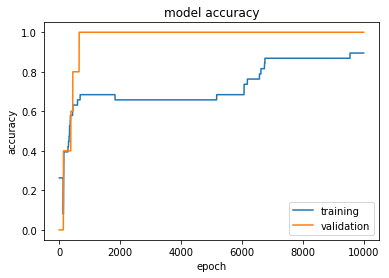


Test loss: 0.393
Test accuracy: 0.947


In [30]:
model = create_dense(4,32,[5] )
evaluate(X_train,X_test,Y_train,Y_test,model,epochs=10000)

In [31]:
X_train,X_test,Y_train,Y_test = data('../data/pubmed/pubmed.csv','../data/pubmed/pubmed_label.csv')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_53 (Dense)             (None, 3)                 195       
Total params: 8,451
Trainable params: 8,451
Non-trainable params: 0
_________________________________________________________________


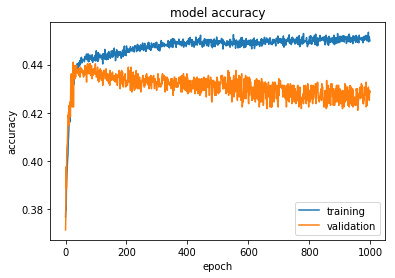


Test loss: 1.06
Test accuracy: 0.439


In [42]:
model = create_dense(3,128,[64] )
evaluate(X_train,X_test,Y_train,Y_test,model,epochs=1000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_57 (Dense)             (None, 3)                 195       
Total params: 8,451
Trainable params: 8,451
Non-trainable params: 0
_________________________________________________________________


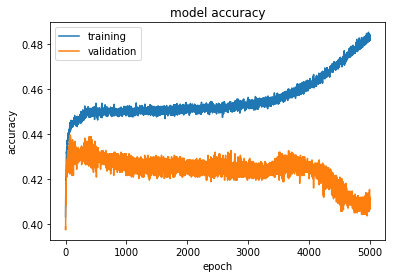


Test loss: 1.07
Test accuracy: 0.423


In [44]:
model = create_dense(3,128,[64] )
evaluate(X_train,X_test,Y_train,Y_test,model,epochs=5000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_64 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_65 (Dense)             (None, 3)                 33        
Total params: 1,433
Trainable params: 1,433
Non-trainable params: 0
_________________________________________________________________


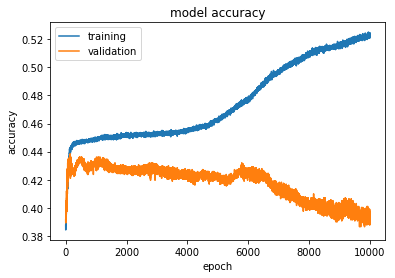


Test loss: 1.14
Test accuracy: 0.401


In [47]:
model = create_dense(3,128,[10,10] )
evaluate(X_train,X_test,Y_train,Y_test,model,epochs=10000)

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
def twitter():
    file = '../data/twitter/twitter.txt'
    with open(file) as f:
        content = f.readlines()
    content = [str(x.strip()) for x in content] 

    vectorizer = TfidfVectorizer()
    vectorizer.fit(content)
    
    vector = vectorizer.transform(content)
    
    X = vector.toarray()

    file_y = '../data/twitter/twitter_label.txt'
    with open(file_y) as f:
        content_y = f.readlines()
    y_item = [int(x.strip()) for x in content_y] 
    y = [2 if x == -1 else x for x in y_item]
    y= np.asarray(y).reshape(len(y),1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    #print(len(y_train))
    
    # print(len(y_train))
    enc = preprocessing.OneHotEncoder(categories='auto')
    enc.fit(y_train)  
    y_train = (enc.transform(y_train).toarray())
    y_test = (enc.transform(y_test).toarray())
    return X_train, X_test, y_train, y_test

In [92]:
X_train,X_test,Y_train,Y_test = twitter()

In [76]:
Y_train.shape

(4800, 3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 10)                29790     
_________________________________________________________________
dense_67 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_68 (Dense)             (None, 3)                 33        
Total params: 29,933
Trainable params: 29,933
Non-trainable params: 0
_________________________________________________________________


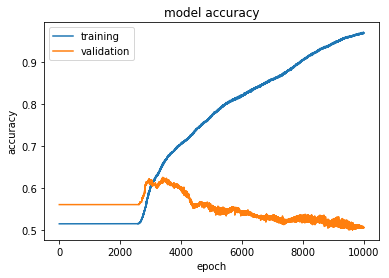


Test loss: 2.61
Test accuracy: 0.512


In [77]:
model = create_dense(3,2978,[10,10] )
evaluate(X_train,X_test,Y_train,Y_test,model,epochs=10000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 1024)              3050496   
_________________________________________________________________
dense_112 (Dense)            (None, 3)                 3075      
Total params: 3,053,571
Trainable params: 3,053,571
Non-trainable params: 0
_________________________________________________________________


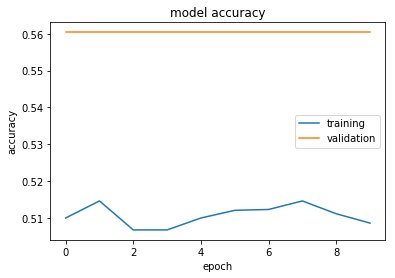


Test loss: 1.0
Test accuracy: 0.502


In [94]:
model = create_dense(3,2978,[1024] )
evaluate(X_train,X_test,Y_train,Y_test,model,epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 1020)              3038580   
_________________________________________________________________
dense_86 (Dense)             (None, 1020)              1041420   
_________________________________________________________________
dense_87 (Dense)             (None, 100)               102100    
_________________________________________________________________
dense_88 (Dense)             (None, 3)                 303       
Total params: 4,182,403
Trainable params: 4,182,403
Non-trainable params: 0
_________________________________________________________________


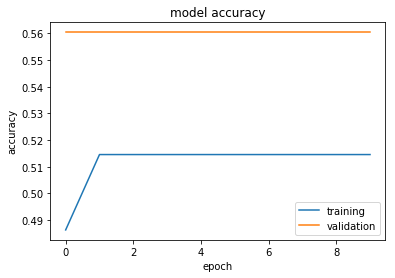


Test loss: 0.997
Test accuracy: 0.502


In [83]:
model = create_dense(3,2978,[1020,1020,100] )
evaluate(X_train,X_test,Y_train,Y_test,model,epochs=10)

In [36]:
accuracy,f1_scoremacro,f1_scoremicro = main(train_data,test_data,y_test)
    print("Nearest neighbor self created")
    print("Test accuracy :: ",accuracy)
    print("Test Macro F1-score :: ",f1_scoremacro)
    print("Test Micro F1-score :: ",f1_scoremicro)

IndentationError: unexpected indent (<ipython-input-36-951bc356a378>, line 2)